# Estimating the effective connectivity in your dataset

### Using whole-brain Reservoir Computing Causality

In [1]:
from methods.compute_ec import RCC

# Create a dict for config
args = {
    "dir": "./Datasets/Logistic_Ignore",
    "r_folder": "Results_Logistic_Ignore",
    "num_jobs": 1,
    "blocks": "vanilla",
    "num_blocks": None,
    "split": 80,
    "skip": 5,
    "length": 100,
    "subjects": ["sub-1_logistic_TS", "sub-8_logistic_TS"],
    "rois": [-1],
    "num_surrogates": 100,
    "min_lag": -20,
    "max_lag": 21,
    "runs": 20,
    "logistic": True,
    "generate": True
}

# Alternatively, this configuration can be stored inside a json file and pass the file name as an argument below
# args = './args.json'
# Create instance of RCC
ReservoirComputingCausality = RCC(args=args)

In [4]:
# Access attributes to see what the method will be run upon
print("Files/subjects to process: ", ReservoirComputingCausality.files)
print("Directory were the results will appear: ", ReservoirComputingCausality.output_dir)
print("Reservoir(s) configuration: \n", ReservoirComputingCausality.I2N, "\n", ReservoirComputingCausality.N2N)
print("You can customize on the fly the ROIs to study by modifying the 'ReservoirComputingCausality.ROIs' property!")
print("etc.")

Files/subjects to process:  ['./Datasets/Logistic_Ignore/sub-8_logistic_TS.txt', './Datasets/Logistic_Ignore/sub-1_logistic_TS.txt']
Directory were the results will appear:  /home/joanfr/Documents/Git-Repos/Effective-Connectivity-Reservoir-Computing/Results_Logistic_Ignore
Reservoir(s) configuration: 
 InputToNode(bias_scaling=1, bias_shift=0, hidden_layer_size=50,
            input_activation='logistic', input_scaling=1, input_shift=0, k_in=1,
            random_state=None) 
 NodeToNode(hidden_layer_size=50, leakage=1, random_state=None, sparsity=1,
           spectral_radius=1)
You can customize on the fly the ROIs to study by modifying the 'ReservoirComputingCausality.ROIs' property!
etc.


In [5]:
# Fit a single subject
f = ReservoirComputingCausality.files[0]
name_f = ReservoirComputingCausality.fit_subject(f, run_self_loops=False, factor=10, verbose=True)

Participant ID: sub-8_logistic_Length-100_Method-RCC
Loading data
Done!
-----
Computing reservoir scores and evidence
Training reservoirs for ROIs [0,1]
Done!
-----
Training surrogate reservoirs for ROIs [0,1]


 21%|██        | 21/100 [01:17<04:45,  3.62s/it]

 22%|██▏       | 22/100 [01:21<04:44,  3.65s/it]

 24%|██▍       | 24/100 [01:28<04:37,  3.65s/it]

 29%|██▉       | 29/100 [01:46<04:16,  3.61s/it]

 50%|█████     | 50/100 [03:02<03:00,  3.62s/it]

 57%|█████▋    | 57/100 [03:27<02:34,  3.60s/it]

 63%|██████▎   | 63/100 [03:49<02:13,  3.62s/it]

 64%|██████▍   | 64/100 [03:53<02:10,  3.62s/it]

 68%|██████▊   | 68/100 [04:07<01:56,  3.66s/it]

 94%|█████████▍| 94/100 [05:41<00:21,  3.63s/it]

 96%|█████████▌| 96/100 [05:49<00:14,  3.65s/it]

100%|██████████| 100/100 [06:03<00:00,  3.64s/it]

Done!
-----
Estimating the directionality for ROIs [0,1]
Done!
-----
Saving the summary for ROIs [0,1]
Done!
-----
Subject finished!
-------------------------------


In [ ]:
# Or fit the whole dataset
ReservoirComputingCausality.fit_dataset(run_self_loops=False, factor=10)

### Using Bivariate Granger causality

In [1]:
from methods.compute_ec import bivariate_GC

# Use a json file for config
# args = "./args.json"

# Create a dict for config
args = {
    "dir": "./Datasets/Logistic",
    "r_folder": "Results_test_bivGC",
    "num_jobs": 1,
    "length": 100,
    "subjects": ["sub-11_logistic_TS", "sub-12_logistic_TS"],
    "rois": [-1],
    "min_lag": -20,
    "logistic": True
}

# Create instance of Bivariate GC
BivariateGrangerCausality = bivariate_GC(args=args)

In [2]:
# Fit a single subject
f = BivariateGrangerCausality.files[0]
name_f = BivariateGrangerCausality.fit_subject(f, run_self_loops=False, make_stationary=False, verbose=True)

Participant ID: sub-11_logistic_Length-100_Method-bivGC
Loading data
Done!
-----
Computing bivariate Granger influence
Estimating the directionality for ROIs [0,1]
Done!
-----
Saving the summary for ROIs [0,1]
Done!
-----
Subject finished!
-------------------------------


/home/joanfr/miniconda3/envs/RCC/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [3]:
# Or fit the whole dataset
BivariateGrangerCausality.fit_dataset(run_self_loops=False, make_stationary=False)

============= Sequential processing =================
INFO: 	 Parallel or sequential processing depends on the input arguments --num_jobs
Participant ID: sub-11_logistic_Length-100_Method-bivGC
Subject finished!
-------------------------------
Participant ID: sub-12_logistic_Length-100_Method-bivGC
Subject finished!
-------------------------------


# Retrospective analyses of the estimation process

### Single subject

In [1]:
from analysis.read_ec import Subject_EC
#dir = "Results_test/"
dir = "Results_Netsim-Dataset_Sim-7_15-February/Results_Dataset-Netsim_Sim-7_Length-100"
name_subject = 'sub-1_sim-7_Length-100_Method-RCC'
ROI_Labels = {1: "Node 1", 2: "Node 2"}
ob = Subject_EC(dir, name_subject, ROI_Labels=ROI_Labels)

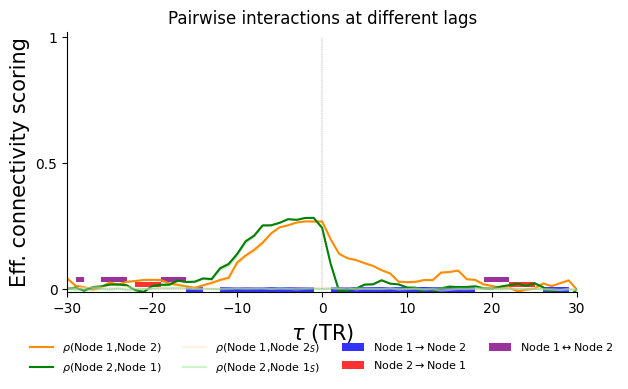

In [8]:
roi_i, roi_j = 1,2
x_label = r"$\tau$ (TR)"
score_label = r"$\rho$"
title = "Pairwise interactions at different lags"
ob.plot_interaction_ij(roi_i, roi_j, x_label=x_label, title=title, score_label=score_label, ylims=(0,1))

In [2]:
Gs, As = ob.Lagged_Networks(weighted=False)
import networkx as nx
nx.get_edge_attributes(Gs[-1], 'weight')

{(1, 3): 1.0,
 (1, 5): 1.0,
 (1, 2): 1.0,
 (4, 1): 1.0,
 (4, 5): 1.0,
 (4, 2): 1.0,
 (3, 5): 1.0,
 (2, 5): 1.0,
 (2, 3): 1.0}

In [4]:
print(As[-1])
ob.save_networks(As, "Results_test", save_as="tsv")

[[0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


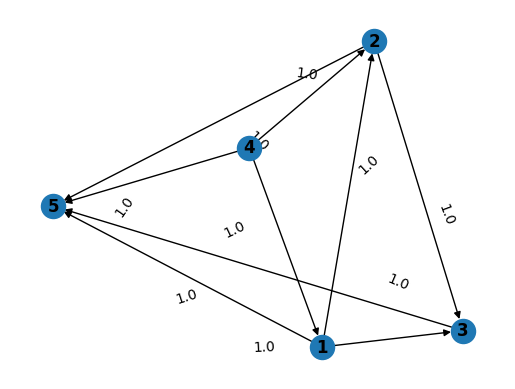

In [5]:
import networkx as nx
pos = nx.spring_layout(Gs[-1])
labels = nx.get_edge_attributes(Gs[-1],'weight')
nx.draw_networkx_edge_labels(Gs[-1], pos, edge_labels=labels)

# Make the graph
nx.draw(Gs[-1], with_labels=True, font_weight="bold", arrows=True)


### Group analyses

In [9]:
from analysis.read_ec import Group_EC

dir = "Results_Netsim-Dataset_Sim-7_15-February/Results_Dataset-Netsim_Sim-7_Length-100"
ob = Group_EC(dir, ROI_Labels=None)
g_binary, a_binary = ob.group_consistency(-4, make_nan=False, threshold=0.07, make_binary=True)
g, a = ob.group_consistency(-4, make_nan=False, threshold=0.0, make_binary=False)

In [ ]:
roi_i, roi_j = 2, 5
ob.plot_interaction_ij(roi_i, roi_j)

In [16]:
# Generate the networks but don't save them in the subject directory
group_matrices = ob.get_networks_Adjacency(weighted=False, bidirectional=False, save_in=False)

# The following shows how to access a particular network at a given lag
lag = -1
sub_ID = ob.subjects["sub-50_sim-7_Length-100_Method-RCC"]
group_matrices[lag][sub_ID]

# We can save the networks all together
#ob.save_networks(group_matrices, directory="Results_test")

array([[0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.]])

# Ground-truth comparissons

In [1]:
from analysis.ground_truths.logistic import Logistic

Logistic_Ground_Truth = Logistic("Results_Logistic_Ignore")
Weighted, Binary = Logistic_Ground_Truth.networks()

In [1]:
from analysis.ground_truths.netsim import Netsim
from analysis.read_ec import Group_EC

# Load data
dir = "Results_Netsim-Dataset_Sim-7_15-February/Results_Dataset-Netsim_Sim-7_Length-100"
threshold = 0.11
Netsim_Results = Group_EC(dir, ROI_Labels=None)
g_binary, a_binary = Netsim_Results.group_consistency(-4, make_nan=False, threshold=threshold, make_binary=True)
g, a = Netsim_Results.group_consistency(-4, make_nan=False, threshold=threshold, make_binary=False)

# Load ground truth
Netsim_Ground_Truth = Netsim(dir)
Weighted, Binary = Netsim_Ground_Truth.weighted_gts, Netsim_Ground_Truth.binary_gt
# This is to show that the implementation can handle partially symmetric networks correctly
""" Netsim_Ground_Truth.binary_gt[1,0] = 1
Netsim_Ground_Truth.binary_gt[2,1] = 1  """

' Netsim_Ground_Truth.binary_gt[1,0] = 1\nNetsim_Ground_Truth.binary_gt[2,1] = 1  '

In [2]:
# Cosntrain your analyses to the structure
kn = 1 # neighbor
a_constraint, _ = Netsim_Ground_Truth.k_neighbor_constraints(a, k=kn)
a_binary_constraint, _ = Netsim_Ground_Truth.k_neighbor_constraints(a_binary, k=kn)
w_preds, gts = Netsim_Ground_Truth.k_neighbor_possible_connectivity(a, k=kn)
b_preds, _ = Netsim_Ground_Truth.k_neighbor_possible_connectivity(a_binary, k=kn)

print("Full reconstructions:")
print(a)
print(a_binary)
print("====================")
print("Constraint reconstructions:")
print(a_constraint)
print(a_binary_constraint)
print("====================")
print("Predictions and ground_truth:")
print(w_preds)
print(b_preds)
print(gts)

Full reconstructions:
[[0.   0.72 0.5  0.44 0.54]
 [0.   0.   0.84 0.58 0.38]
 [0.2  0.   0.   0.78 0.56]
 [0.16 0.16 0.   0.   0.56]
 [0.14 0.26 0.14 0.18 0.  ]]
[[0 1 1 1 1]
 [0 0 1 1 1]
 [1 0 0 1 1]
 [1 1 0 0 1]
 [1 1 1 1 0]]
Constraint reconstructions:
[[0.   0.72 0.   0.   0.54]
 [0.   0.   0.84 0.   0.  ]
 [0.   0.   0.   0.78 0.  ]
 [0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.  ]]
[[0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]
Predictions and ground_truth:
[0.72 0.54 0.84 0.78 0.56 0.   0.   0.   0.14 0.18]
[1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


In [3]:
from analysis.ground_truths.utils import Metrics
netsim_metrics = Metrics(gts, weighted_predictions=w_preds, binary_predictions=b_preds)
sensitivity, specificity, positive_predictive_value, negative_predictive_value = netsim_metrics.compute_confusion_matrix()
auc = netsim_metrics.auc(n_bootstrap=100)
print(sensitivity, specificity, positive_predictive_value, negative_predictive_value, auc)

1.0 0.6 0.7142857142857143 1.0 1.0


/home/joanfr/Documents/Git-Repos/Effective-Connectivity-Reservoir-Computing/analysis/ground_truths/utils.py:203: UserWarning: Bootstrapping with less than 500 resamples is not encouraged
  warnings.warn("Bootstrapping with less than 500 resamples is not encouraged")


In [7]:
netsim_metrics.positive_predictive_value(n_bootstrap=100)

/home/joanfr/Documents/Git-Repos/Effective-Connectivity-Reservoir-Computing/analysis/ground_truths/utils.py:299: UserWarning: Bootstrapping with less than 500 resamples is not encouraged
  warnings.warn("Bootstrapping with less than 500 resamples is not encouraged")


0.7142857142857143

(array([ 1.,  2.,  1.,  4., 14., 11., 21., 15., 21., 10.]),
 array([0.16666667, 0.25      , 0.33333333, 0.41666667, 0.5       ,
        0.58333333, 0.66666667, 0.75      , 0.83333333, 0.91666667,
        1.        ]),
 <BarContainer object of 10 artists>)

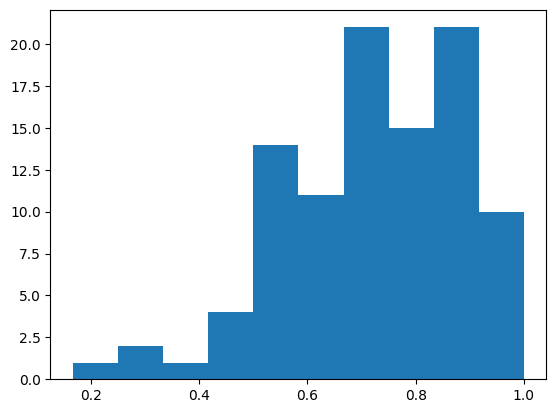

In [8]:
import matplotlib.pylab as plt
plt.hist(netsim_metrics.bootstrap_stats.ppv.all)

In [9]:
# Test fo datasets
import numpy as np
weighted_pred = [w_preds, w_preds, w_preds]
binary_pred = [b_preds, b_preds, b_preds]
from analysis.ground_truths.utils import Metrics
netsim_metrics = Metrics(gts, weighted_predictions=weighted_pred, binary_predictions=binary_pred)
sensitivity, specificity, positive_predictive_value, negative_predictive_value = netsim_metrics.compute_confusion_matrix()
auc = netsim_metrics.auc(n_bootstrap=100)
print(sensitivity, "\n", specificity, "\n", positive_predictive_value, "\n", negative_predictive_value, "\n", auc)

/home/joanfr/Documents/Git-Repos/Effective-Connectivity-Reservoir-Computing/analysis/ground_truths/utils.py:192: UserWarning: Bootstrapping with less than 500 resamples is not encouraged
  warnings.warn("Bootstrapping with less than 500 resamples is not encouraged")


[1. 1. 1.] 
 [0.6 0.6 0.6] 
 [0.71428571 0.71428571 0.71428571] 
 [1. 1. 1.] 
 [1. 1. 1.]


In [17]:
netsim_metrics.positive_predictive_value(n_bootstrap=100)

/home/joanfr/Documents/Git-Repos/Effective-Connectivity-Reservoir-Computing/analysis/ground_truths/utils.py:288: UserWarning: Bootstrapping with less than 500 resamples is not encouraged
  warnings.warn("Bootstrapping with less than 500 resamples is not encouraged")


array([0.71428571, 0.71428571, 0.71428571])

(array([ 2.,  4., 12.,  9., 11., 13., 12., 15.,  6., 16.]),
 array([0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 10 artists>)

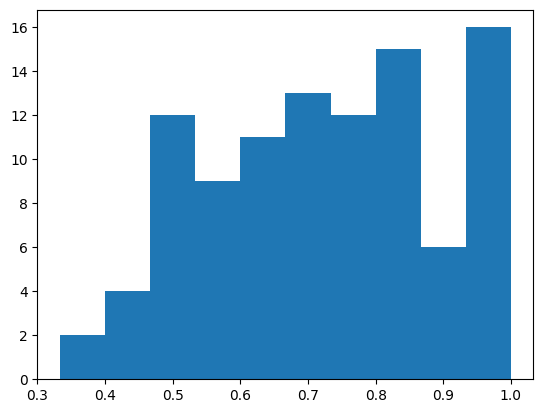

In [20]:
import matplotlib.pylab as plt
plt.hist(netsim_metrics.bootstrap_stats.ppv.all[0])

[Text(0, -3.090232306167813, '0.1%'),
 Text(0, -2.3263478740408408, '1%'),
 Text(0, -1.6448536269514729, '5%'),
 Text(0, -0.8416212335729142, '20%'),
 Text(0, 0.0, '50%'),
 Text(0, 0.8416212335729143, '80%'),
 Text(0, 1.6448536269514722, '95%'),
 Text(0, 2.3263478740408408, '99%'),
 Text(0, 3.090232306167813, '99.9%')]

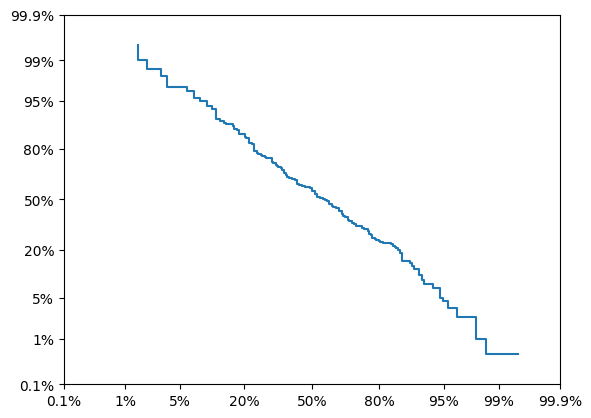

In [3]:
from sklearn.metrics import det_curve, roc_curve
import scipy
import numpy as np
import matplotlib.pylab as plt

true, pred = np.random.randint(0,2,400),np.random.rand(400)
xx, yy, _ = det_curve(true, pred)
xx_roc, yy_roc, _ = roc_curve(true, pred)
fig, ax = plt.subplots()
ax.plot(scipy.stats.norm.ppf(xx),scipy.stats.norm.ppf(yy))
ticks = [0.001, 0.01, 0.05, 0.20, 0.5, 0.80, 0.95, 0.99, 0.999]
tick_locations = scipy.stats.norm.ppf(ticks)
tick_labels = [
    "{:.0%}".format(s) if (100 * s).is_integer() else "{:.1%}".format(s)
    for s in ticks
]
ax.set_xticks(tick_locations)
ax.set_yticks(tick_locations)
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

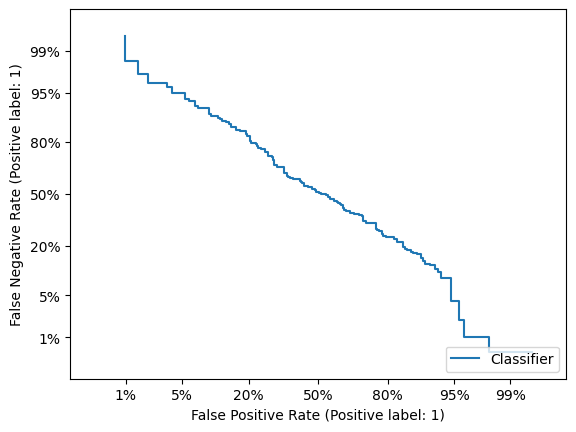

In [45]:
from sklearn.metrics import DetCurveDisplay
DetCurveDisplay.from_predictions(true, pred)

In [1]:
from analysis.stats import ROC_utils, DET_utils
import numpy as np

true, pred = np.random.randint(0,2,400), np.random.rand(400)
pred_bis = np.random.rand(400)
resolution = 0.01

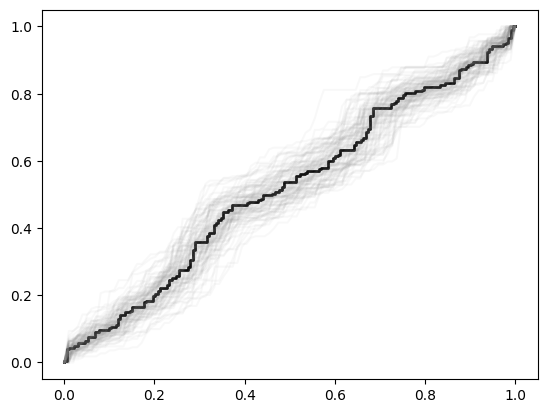

In [2]:
ROC = ROC_utils(pred, true)
ROC_BOOTSTRAPPED = ROC.bootstrap_roc(CI_level=99, resolution=resolution, n_bootstrap=100)

import matplotlib.pylab as plt
plt.plot(ROC.fpr_real, ROC.tpr_real, c="black", linewidth=2)
#plt.fill_between(ROC_BOOTSTRAPPED.fpr, ROC_BOOTSTRAPPED.CI__parametric__true_value[1], ROC_BOOTSTRAPPED.CI__parametric__true_value[0], color="gray", alpha=0.5)
#plt.fill_between(ROC_BOOTSTRAPPED.fpr, ROC_BOOTSTRAPPED.CI__nonparametric__sorted_tprates[1], ROC_BOOTSTRAPPED.CI__nonparametric__sorted_tprates[0], color="gray", alpha=0.25)
#plt.fill_between(ROC_BOOTSTRAPPED.fpr, ROC_BOOTSTRAPPED.CI__nonparametric__sorted_auc[1], ROC_BOOTSTRAPPED.CI__nonparametric__sorted_auc[0], color="gray", alpha=0.1)
for i in range(100):
    plt.plot(ROC_BOOTSTRAPPED.fpr, ROC_BOOTSTRAPPED.tpr[i], alpha=0.05, c="gray")

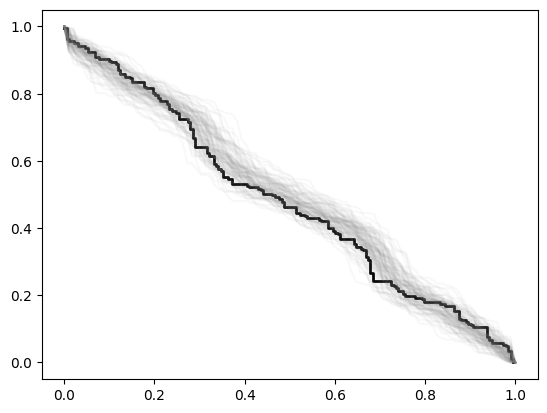

In [4]:
DET = DET_utils(pred, true)
DET_BOOTSTRAPPED = DET.bootstrap_det(CI_level=99, resolution=resolution, n_bootstrap=100)

import matplotlib.pylab as plt
plt.plot(DET.fpr_real, DET.fnr_real, c="black", linewidth=2)
#plt.fill_between(DET_BOOTSTRAPPED.fpr, DET_BOOTSTRAPPED.CI.parametric.true_value[1], DET_BOOTSTRAPPED.CI.parametric.true_value[0], color="gray", alpha=0.5)
#plt.fill_between(DET_BOOTSTRAPPED.fpr, DET_BOOTSTRAPPED.CI__nonparametric__sorted_tprates[1], DET_BOOTSTRAPPED.CI__nonparametric__sorted_tprates[0], color="gray", alpha=0.25)
#plt.fill_between(DET_BOOTSTRAPPED.fpr, DET_BOOTSTRAPPED.CI__nonparametric__sorted_auc[1], DET_BOOTSTRAPPED.CI__nonparametric__sorted_auc[0], color="gray", alpha=0.1)
for i in range(100):
    plt.plot(DET_BOOTSTRAPPED.fpr, DET_BOOTSTRAPPED.fnr[i], alpha=0.05, c="gray")

(1.5771761370818982, 0.11475500215325952)
(1.5771761370818982, 0.05737750107662976)
(1.5771761370818982, 0.9426224989233702)


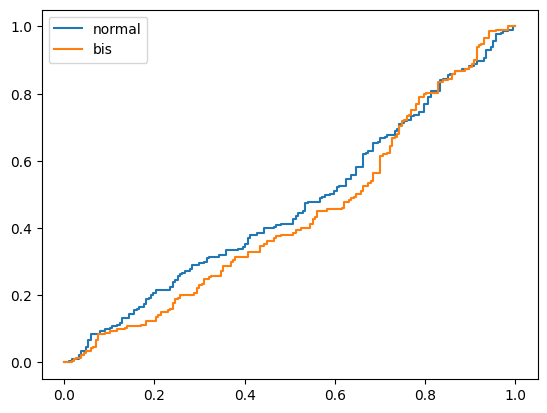

In [2]:
from analysis.stats import DeLong_Test
from sklearn.metrics import roc_curve
import numpy as np

true, pred = np.random.randint(0,2,400), np.random.rand(400)
pred_bis = np.random.rand(400)
pred_bis[:300] = pred[:300]

xx, yy, _ = roc_curve(true, pred)
xx_bis, yy_bis, _ = roc_curve(true, pred_bis)

DeLong = DeLong_Test(true)
p_2 = DeLong.delong_roc_test(pred, pred_bis, alternative="two-sided")
p_great = DeLong.delong_roc_test(pred, pred_bis, alternative="greater")
p_lower = DeLong.delong_roc_test(pred, pred_bis, alternative="lower")
print(p_2)
print(p_great)
print(p_lower)

import matplotlib.pylab as plt

plt.plot(xx,yy, label="normal")
plt.plot(xx_bis, yy_bis, label="bis")
plt.legend()

In [4]:
import scipy.stats
1-scipy.stats.norm.cdf(p[0], loc=0, scale=1)

array([0.86381262])